# 

## 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。


h
θ
(
x
)
=
θ
0
x
0
+
θ
1
x
1
+
.
.
.
+
θ
j
x
j
+
.
.
.
+
θ
n
x
n
.
(
x
0
=
1
)

$x$ : 特徴量ベクトル


$\theta$ : パラメータベクトル


$n$ : 特徴量の数


$x_j$ : j番目の特徴量


$\theta_j$ : j番目のパラメータ（重み）


特徴量の数$n$は任意の値に対応できる実装にしてください。


なお、ベクトル形式で表すと以下のようになります。


h
θ
(
x
)
=
θ
T
⋅
x
.

雛形


クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。

In [1]:
import numpy as np

In [2]:
# def _linear_hypothesis(X, n_sample, theta_T):
#     """
#     線形の仮定関数を計算する
#     Parameters
#     ----------
#     X : 次の形のndarray, shape (n_samples, n_features)
#       訓練データ
#     Returns
#     -------
#       次の形のndarray, shape (n_samples, 1)
#       線形の仮定関数による推定結果
#     """
#     h = np.array([])

#     for i in range(n_sample):
#         h = np.append(h, X[i] @ theta_T)

#     return h.reshape(n_sample, 1)

# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

$$\theta_j=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}[(h_\theta(x^i)-y^i)x_j^i]$$

$\alpha$ : 学習率


$i$ : サンプルのインデックス


$j$ : 特徴量のインデックス


雛形


ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。 

単公式なら
$$h_\theta = \alpha X + \beta$$


In [3]:
# def _gradient_descent(function, XX, y, ite, alpha):
    
#     # XXの調整
#     XR = XX.reshape(1, XX.shape[0]) # 2次元に変換
#     XT = XR.T # 転置
#     X = np.zeros((XT.shape[0], XT.shape[1] + 1)) # 初期化0埋め
#     X_0 = 1

#     # Xの追加
#     for i in range(X.shape[0]):
#         X[i] = np.append(X_0, XT[i]) # 切片ステータスである1を各行に１番目に追加

#     # Xからのパラメータ    
#     n_sample = X.shape[0] # サンプル数
#     n_feature = X.shape[1] # 特徴量の数

#     # 重みの設定
#     theta = np.zeros((1, n_feature)) #重みの設定
#     theta_history = np.zeros((ite, n_feature)) # 10回繰り返すので初期値
#     theta_T = theta.T
#     ARRAY = np.array([])

#     for ite in range (ite):
#         for j in range(n_feature):
#             for i in range(n_sample):
#                 ARRAY = np.append(ARRAY, ((_linear_hypothesis(X, n_sample, theta_T)[i] - y[i]) * X[i][j]))
#             theta_T[j] = theta_T[j] - ((alpha / n_sample) * ARRAY.sum()) 
#             ARRAY = np.array([])
#         theta_history[ite] = theta_T.T
        
    
#     import matplotlib.pyplot as plt
#     plt.plot(np.arange(ite + 1), theta_history[:, 0])
#     plt.plot(np.arange(ite + 1), theta_history[:, 1]);
    
#     return theta_T

## 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。


平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。


平均二乗誤差は以下の数式で表されます。


L
(
θ
)
=
1
m
m
∑
i
=
1
 
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
2
.

m
 : 入力されるデータの数


h
θ
(
)
 : 仮定関数


x
(
i
)
 : i番目のサンプルの特徴量ベクトル


y
(
i
)
 : i番目のサンプルの正解値


なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）

In [4]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    
    n_sample = y_pred.shape[0] # サンプル数
    mse = ((y_pred - y) ** 2).sum() / n_sample # 計算式

    return mse

In [5]:
import numpy as np
y_pred = np.array([10, 20, 31, 42, 53])
y = np.array([10, 20, 30, 40, 50])
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y)

2.8

In [6]:
MSE(y_pred, y)

2.8

## 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。


仮定関数 $h_\theta(x)$ の出力が推定結果です【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。


仮定関数 $h_\theta(x)$ の出力が推定結果です

## 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


目的関数（損失関数） $J(\theta)$ は次の式です。【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


目的関数（損失関数） $J(\theta)$ は次の式です。

In [40]:
import numpy as np
import matplotlib.pyplot as plt


class ScratchLinearRegression():

    def __init__(self, num_iter, lr, no_bias=True, verbose=False):
        """
        線形回帰のスクラッチ実装

        Parameters
        ----------
        num_iter : int
        イテレーション数
        lr : float
        学習率
        no_bias : bool
        バイアス項を入れない場合はTrue
        verbose : bool
        学習過程を出力する場合はTrue

        Attributes
        ----------
        self.coef_ : 次の形のndarray, shape (n_features,)
        パラメータ
        self.loss : 次の形のndarray, shape (self.iter,)
        訓練データに対する損失の記録
        self.val_loss : 次の形のndarray, shape (self.iter,)
        検証データに対する損失の記録
        """
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)  # 損失関数格納用
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self, X, theta_T,):
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ
        theta_T : 次の形のndarray, shape(n_features, 1)
        更新されていく重み
        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
        """
        # この関数を使用するたび初期化
        h = np.array([])
        
        # 仮定関数の作成
        for i in range(X.shape[0]):
            h = np.append(h, X[i] @ theta_T)

        return h.reshape(X.shape[0], 1)
    
    def _gradient_descent(self, X, y, theta_T):
        """
        傾きを計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ
        y : 次の形のndarray, shape (n_samples, 1)
        目的データ
        theta_T : 次の形のndarray, shape(n_features, 1)
        更新されていく重み
        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
        """

        for j in range(X.shape[1]):
            # 1 * 7 @ 7 * 1の形に変更して答を合計値の1*1で出力
            sigma = (X[:, j].T @ (self._linear_hypothesis(X, theta_T) - y))
            theta_T[j] = theta_T[j] - ((self.lr / X.shape[0]) * sigma)

        return theta_T  # thetaを返す
    
    def fit(self, Xtrain, ytrain, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        theta_Tを最適にしてグローバルにするため
        Parameters
        ----------
        Xtrain : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        ytrain : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """

        # XXの調整
        X = np.zeros((Xtrain.shape[0], Xtrain.shape[1] + 1))  # 初期化0埋め
        X_0 = 1

        # Xの追加
        for i in range(X.shape[0]):
            X[i] = np.append(X_0, Xtrain[i])  # 切片ステータスである1を各行に１番目に追加
            
        # yの変形
        y = ytrain.reshape(ytrain.shape[0], 1)
        
        # 他の関数で使用できるように
        self.X = X
        self.y = y

        # 重みの設定
        self.theta = np.zeros((1, X.shape[1]))  # 重みの設定
        theta_T = self.theta.T
        theta_history = np.zeros((self.iter, X.shape[1]))  # iter回繰り返すので初期値

        for i in range(self.iter):
            theta_T = self._gradient_descent(X, y, theta_T)
            theta_history[i] = theta_T.T
            self.theta_T = theta_T
            self.loss[i] = self.get_loss(X, y, theta_T)

        # 計算後をグローバルに
        self.theta_history = theta_history
        self.theta_T = theta_T
        self.coef_ = theta_T.T[:, 1:]
        self.intercept_ = theta_T.T[:, 0]
        
        # 学習仮定出力
        if self.verbose:
            print('学習過程 : {}'.format(theta_history))
        
        
        #   
        # 検証データがONのとき
        #
        if type(Xtrain)==type(X_val):
            
            # XXの調整
            Xv = np.zeros((X_val.shape[0], X_val.shape[1] + 1))  # 初期化0埋め
            X_0 = 1

            # Xの追加
            for i in range(X_val.shape[0]):
                Xv[i] = np.append(X_0, X_val[i])  # 切片ステータスである1を各行に１番目に追加

            # yの変形
            yv = y_val.reshape(y_val.shape[0], 1)

            # 重みの設定
            self.theta_v = np.zeros((1, Xv.shape[1]))  # 重みの設定
            theta_T_v = self.theta_v.T
            theta_history_v = np.zeros((self.iter, Xv.shape[1]))  # iter回繰り返すので初期値

            for i in range(self.iter):
                theta_T_v = self._gradient_descent(Xv, yv, theta_T_v)
                theta_history_v[i] = theta_T_v.T
                self.theta_T_v = theta_T_v
                self.val_loss[i] = self.get_loss(Xv, yv, theta_T_v)

            # 計算後をグローバルに
            self.theta_history_v = theta_history_v
            self.theta_T_v = theta_T_v
            self.coef_v = theta_T_v.T[:, 1:]
            self.intercept_v = theta_T_v.T[:, 0]
        
        
    def draw_graph(self):
        """
        グラフを書くだけ
        """
        plt.xlabel('iter')
        plt.ylabel('theta')
        plt.plot(np.arange(self.iter), self.theta_history[:, 0], label='theta0')
        plt.plot(np.arange(self.iter), self.theta_history[:, 1], label='theta1')
        plt.plot(np.arange(self.iter), self.theta_history[:, 2], label='theta2')
        plt.legend();


    def get_loss(self, X, y, theta_T):
        """
        平均二乗誤差の計算
        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値
        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """

        # 計算用
        yi_pred = np.array([])

        # 損失の計算
        for i in range(X.shape[0]):
            yi_pred = np.append(yi_pred, X[i] @ theta_T)
        
        # 計算式
        loss = ((yi_pred - y) ** 2).sum() / (X.shape[0] * 2)

        return loss
    
    def predict(self, Xtest):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        test_X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        X_0 = 1
        X = np.zeros((Xtest.shape[0], Xtest.shape[1] + 1))  # 初期化0埋め
        
        # Xの追加
        for i in range(Xtest.shape[0]):
            X[i] = np.append(X_0, Xtest[i])  # 切片ステータスである1を各行に１番目に追加
        
        # y_predの計算
        y_pred = np.array([])
        
        for i in range(X.shape[0]):
            y_pred = np.append(y_pred, X[i] @ self.theta_T)
            y_pred = y_pred.reshape(y_pred.shape[0], 1)
        
        return y_pred

In [41]:
# 検証でーた　セット
train_x = np.array([0, 1, 2, 3, 4, 5, 6])
train_y = np.array([1, 3, 5, 7.25, 9, 10.75, 12.25])
test_x = np.array([7, 8, 9, 10])
test_y = np.array([15.5, 17, 19, 21])
train_x = train_x.reshape(train_x.shape[0], 1)
train_y = train_y.reshape(train_y.shape[0], 1)
test_x = test_x.reshape(test_x.shape[0], 1)
test_y = test_y.reshape(test_y.shape[0], 1)

In [42]:
# 自分のモデルの結果
test = ScratchLinearRegression(num_iter=30, lr=0.01, verbose=True)
test.fit(train_x, train_y, test_x, test_y)
test.predict(test_x)

学習過程 : [[0.06892857 0.28078929]
 [0.12874418 0.5232815 ]
 [0.18068686 0.73269144]
 [0.22582782 0.91352386]
 [0.2650924  1.06967013]
 [0.29927994 1.20449176]
 [0.32908096 1.32089254]
 [0.35509195 1.4213809 ]
 [0.37782817 1.50812368]
 [0.39773475 1.5829927 ]
 [0.4151962  1.64760491]
 [0.43054466 1.70335707]
 [0.44406707 1.75145578]
 [0.4560113  1.79294333]
 [0.46659146 1.8287201 ]
 [0.47599251 1.85956385]
 [0.48437424 1.88614647]
 [0.49187468 1.90904833]
 [0.49861305 1.9287708 ]
 [0.50469237 1.94574697]
 [0.51020161 1.96035096]
 [0.51521763 1.97290595]
 [0.51980685 1.98369111]
 [0.52402662 1.99294761]
 [0.5279265  2.00088377]
 [0.53154929 2.00767954]
 [0.53493198 2.01349039]
 [0.53810652 2.01845058]
 [0.54110051 2.02267613]
 [0.54393779 2.02626725]]


array([[14.72780852],
       [16.75407576],
       [18.78034301],
       [20.80661025]])

In [10]:
# 公式の結果
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(test_x.reshape(test_x.shape[0], 1), test_y)
reg.predict(test_x.reshape(test_x.shape[0], 1))

array([[15.35],
       [17.2 ],
       [19.05],
       [20.9 ]])

In [11]:
# 係数の確認
print(reg.coef_)
print(reg.intercept_)
print(test.coef_)
print(test.intercept_)

[[1.85]]
[2.4]
[[2.02626725]]
[0.54393779]


予測値はほぼほぼ同じ値になった。  
係数は多少ずれているが、どちらも想定している係数に完璧に合うわけではなかった。

## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [12]:
import pandas as pd
house_train = pd.read_csv('train.csv')
house_test = pd.read_csv('test.csv')
house_X_test = house_test[['GrLivArea', 'YearBuilt']]
TARGET = house_train['SalePrice']
house_X_train = house_train[['GrLivArea', 'YearBuilt']]

In [13]:
H_model_L = LinearRegression()
H_model_L.fit(house_X_train.values, TARGET.values)
print(H_model_L.coef_)
print(H_model_L.intercept_)

[  95.16733349 1045.86241944]
-2024976.362585636


In [14]:
# 学習率は目的関数の値の合計がかなり大きいため、相当小さくしないと発散する
H_model = ScratchLinearRegression(num_iter=30, lr=0.00000038)
H_model.fit(house_X_train.values, TARGET.values)

In [15]:
print(H_model.coef_)
print(H_model.intercept_)

[[104.53537754  11.65326549]]
[0.06085764]


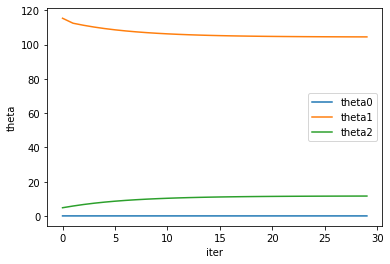

In [16]:
H_model.draw_graph()

In [17]:
my = H_model.predict(house_X_test.values)
sk = H_model_L.predict(house_X_test.values)

In [18]:
# 列名はリストで上げなきゃならない
my_df = pd.DataFrame(my, columns=['my_model_pred'])
sk_df = pd.DataFrame(sk, columns=['sk_model_pred'])
RESULT = pd.concat([my_df, sk_df], axis=1)
RESULT.head(20)

,my_model_pred,sk_model_pred
0,116515.812751,111229.772751
1,161744.671429,149299.640894
2,193559.762045,218638.475300
3,190958.030872,217305.154382
4,157018.648956,180195.763814
5,196231.068799,216929.376293
6,147296.858845,171345.201799
7,176427.613394,204076.895027
8,163372.000455,183909.246318
9,115157.196854,119310.191857


予測値は桁数は同じなもののかなりずれている。
損失関数で確認

## 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。


線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

In [19]:
# データ分割
from sklearn.model_selection import train_test_split
train_X75, test_X25 = train_test_split(house_X_train, random_state=0)
TARGET_y75, TARGET_y25 = train_test_split(TARGET, random_state=0)

In [22]:
# skmodelでの検証
sk_model = LinearRegression()
sk_model.fit(train_X75.values, TARGET_y75.values)
sk_pred = sk_model.predict(test_X25.values)

# 誤差計算
from sklearn.metrics import mean_squared_error
sk_loss = mean_squared_error(TARGET_y25.values, sk_pred) / 2

In [58]:
# 自作モデルでの検証
my_model = ScratchLinearRegression(num_iter=5000, lr=0.00000006)
my_model.fit(train_X75.values, TARGET_y75.values, test_X25.values, TARGET_y25.values)

# 誤差計算
my_loss = my_model.loss

In [59]:
display(sk_loss)
display(my_loss[-1])

1362954049.5318189

5095409079060.666

自作モデルの方が200倍誤差の値が多かった。  
学習率を変化させても値は大きく変わらない結果となった。

In [65]:
# 自作モデルでの検証
my_model2 = ScratchLinearRegression(num_iter=30, lr=0.00000004)
my_model2.fit(train_X75.values, TARGET_y75.values, test_X25.values, TARGET_y25.values)

# 誤差計算
my_loss2 = my_model.loss

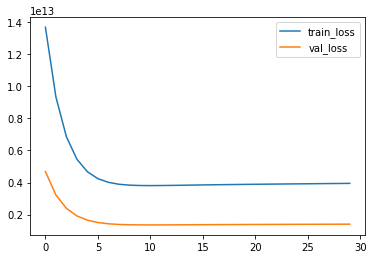

In [66]:
plt.plot(np.arange(my_model2.iter), my_model2.loss, label='train_loss')
plt.plot(np.arange(my_model2.iter), my_model2.val_loss, label='val_loss')
plt.legend();

誤差関数に関しては、目的通り最小化できている。 

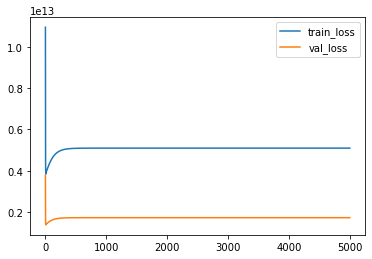

In [61]:
plt.plot(np.arange(my_model.iter), my_model.loss, label='train_loss')
plt.plot(np.arange(my_model.iter), my_model.val_loss, label='val_loss')
plt.legend();

5000回繰り返した場合、100-200回で誤差が増加している。  
原因を探る。